#Titanic Visualization

##Introduction

The Titanic disaster of 1912 remains one of history's most infamous maritime tragedies. This analysis explores the Titanic dataset to uncover survival patterns using Exploratory Data Analysis (EDA). We will clean and preprocess the data, handle missing values, and perform feature engineering to extract meaningful insights.

Using Pandas, Matplotlib, and Seaborn, we will visualize survival rates based on age, gender, and passenger class. Our goal is to identify key factors that influenced survival chances, providing a clearer understanding of the disaster's impact.

##Importing Libraries:

We'll begin by importing the necessary Python libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

##Loading the Dataset:

Load the Titanic dataset which is available as a CSV file named, we load it into a DataFrame

In [2]:
df = pd.read_csv('Titanic-Dataset.csv')

##Exploring the Data:

To gain initial insights, we'll examine the first few rows and the structure of the dataset:

In [3]:
print("=" * 40)
print("DataFrame Info")
print("=" * 40)
df.info()

print("\n" + "=" * 40)
print("DataFrame Description")
print("=" * 40)
print(df.describe())

print("\n" + "=" * 40)
print("Missing Values")
print("=" * 40)
print(df.isnull().sum())

DataFrame Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

DataFrame Description
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008

##Data Cleaning:

Handling missing values is crucial for accurate analysis. Here's how we can address them:

* Age: Fill missing values with the median age.

* Embarked: Fill missing values with the mode (most frequent value).

* Cabin: Due to a high number of missing values, we'll create a new feature indicating whether a cabin number was recorded and then drop the original 'Cabin' column.

In [4]:
df['Age'] = df['Age'].fillna(df['Age'].median())

df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

df.drop(columns=['Cabin'], inplace=True)

print("\n" + "=" * 40)
print("Missing Values")
print("=" * 40)
print(df.isnull().sum())

print("\n" + "=" * 40)
print("DataFrame Description")
print("=" * 40)
print(df.describe())


Missing Values
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

DataFrame Description
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.361582    0.523008   
std     257.353842    0.486592    0.836071   13.019697    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
mi

##Handling Outliers

We identify and handle outliers:

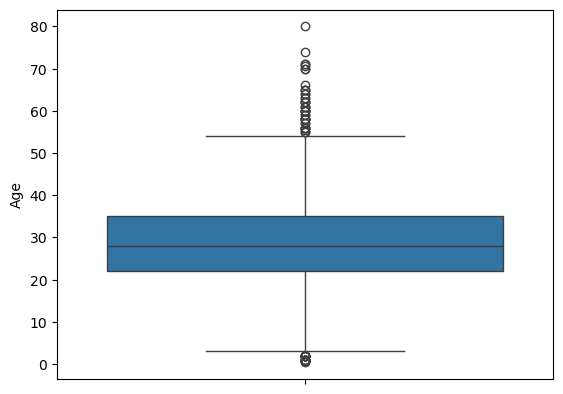

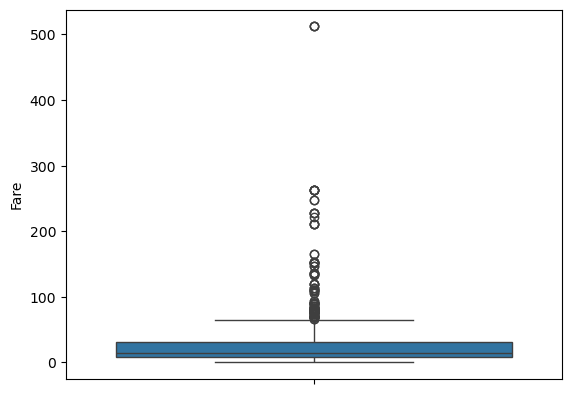

In [5]:
sns.boxplot(df['Age'])
plt.show()

print("\n" + "=" * 80 + "\n")

sns.boxplot(df['Fare'])
plt.show()

To cap extreme values in Fare:

In [6]:
df['Fare'] = df['Fare'].apply(lambda x: x if x < 200 else 200)

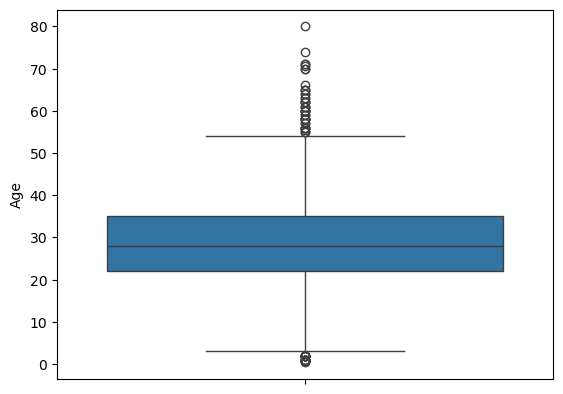

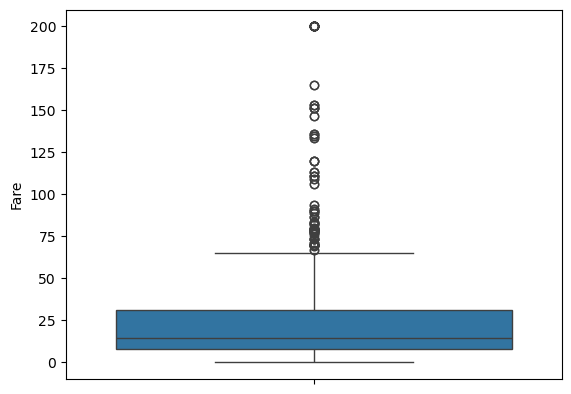

In [7]:
sns.boxplot(df['Age'])
plt.show()

print("\n" + "=" * 80 + "\n")

sns.boxplot(df['Fare'])
plt.show()

The outliers are meaningful (e.g., some passengers had many siblings/spouses or were very old), So I choose to leave them.

##Feature Engineering:

Creating new features can provide additional insights:

* FamilySize: Total number of family members aboard (siblings/spouses + parents/children + 1).

* IsAlone: Indicates whether the passenger was alone.

In [8]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)

##Data Visualization:

Visualizations help in understanding the relationships between features and survival rates.

###Survival Rate by Gender:

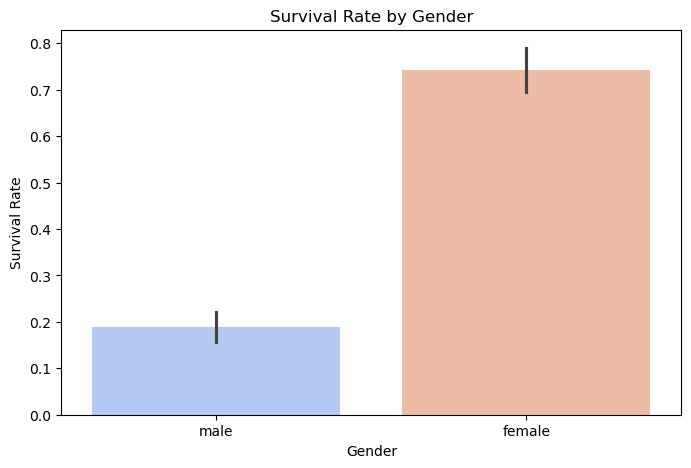

In [9]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Sex', y='Survived', hue='Sex', data=df, palette='coolwarm', legend=False)
plt.title('Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Survival Rate')
plt.show()

Interpretation:

This plot reveals the survival rates among male and female passengers, highlighting any disparities.

###Survival Rate by Passenger Class:

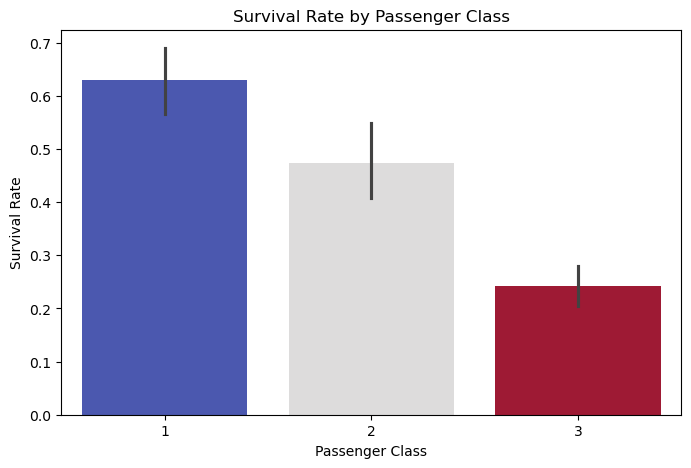

In [10]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Pclass', y='Survived', hue='Pclass', data=df, palette='coolwarm', legend=False)
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

Interpretation:

This visualization illustrates how survival rates varied across different passenger classes.

###Age Distribution Among Survivors and Non-Survivors:

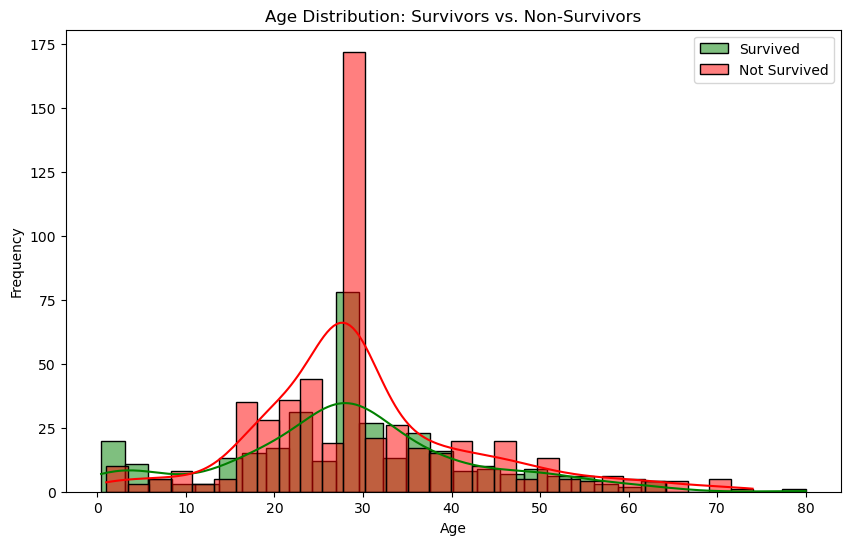

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(df[df['Survived'] == 1]['Age'], bins=30, kde=True, color='green', label='Survived')
sns.histplot(df[df['Survived'] == 0]['Age'], bins=30, kde=True, color='red', label='Not Survived')
plt.legend()
plt.title('Age Distribution: Survivors vs. Non-Survivors')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Interpretation:

This histogram compares the age distributions of survivors and non-survivors, potentially highlighting age groups with higher survival rates.

###Survival Rate by Family Size:

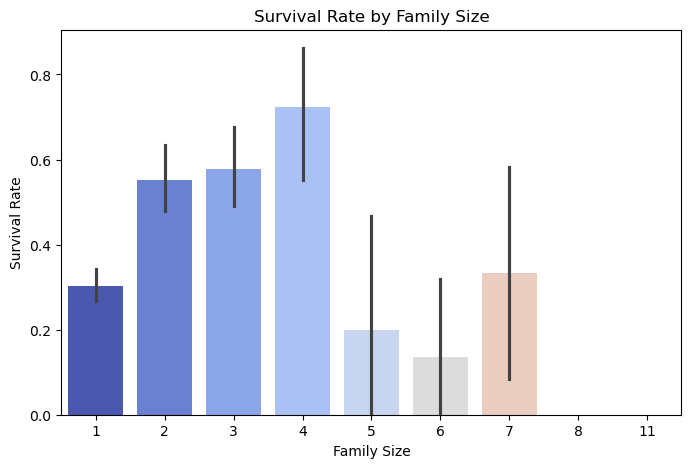

In [12]:
plt.figure(figsize=(8, 5))
sns.barplot(x='FamilySize', y='Survived', hue='FamilySize', data=df, palette='coolwarm', legend=False)
plt.title('Survival Rate by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Survival Rate')
plt.show()

Interpretation:

This plot examines how the number of family members aboard influenced survival chances.

##Feature Importance Analysis

To determine the most important features influencing survival, we train a Logistic Regression model.

###Feature Encoding & Scaling

In [13]:
print(df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'FamilySize', 'IsAlone'],
      dtype='object')


In [14]:
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=False)

In [15]:
print(df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'FamilySize', 'IsAlone', 'Sex_female', 'Sex_male',
       'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')


In [16]:
X = df[['Pclass', 'Age', 'Fare', 'FamilySize', 'IsAlone', 'Sex_male', 'Sex_female', 'Embarked_Q', 'Embarked_S']]
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train[['Age', 'Fare']] = scaler.fit_transform(X_train[['Age', 'Fare']])
X_test[['Age', 'Fare']] = scaler.transform(X_test[['Age', 'Fare']])

###Train a Logistic Regression Model

In [17]:
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Model Accuracy:", accuracy_score(y_test, y_pred))

Model Accuracy: 0.8044692737430168


###Feature Importance Visualization

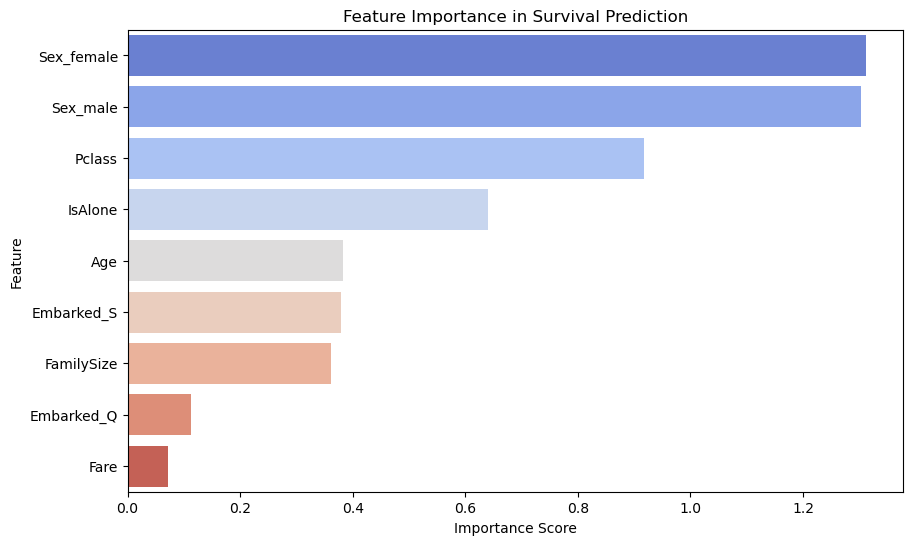

In [18]:
importance = np.abs(model.coef_[0])
features = pd.DataFrame({'Feature': X.columns, 'Importance': importance})
features = features.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=features['Importance'], y=features['Feature'], hue=features['Feature'], palette='coolwarm', legend=False)
plt.title('Feature Importance in Survival Prediction')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

Interpretation:

This plot highlights the features most strongly associated with survival probability, helping to identify the most influential factors.

##Conclusion:

Through this EDA, we've explored various factors affecting passenger survival on the Titanic, including gender, class, age, and family size. These insights can inform predictive modeling and enhance our understanding of the disaster's dynamics.